# Load Dataset banknote-authentication

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
names = ['var-WTI', 'skew-WTI', 'curt-WTI', 'ent-of-image', 'target']
df = pd.read_csv(url, names=names)

# Standarisasi Data

In [2]:
features = ['var-WTI', 'skew-WTI', 'curt-WTI', 'ent-of-image']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Proyeksi PCA ke 2D

In [3]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

# Visualisasi Proyeksi 2D

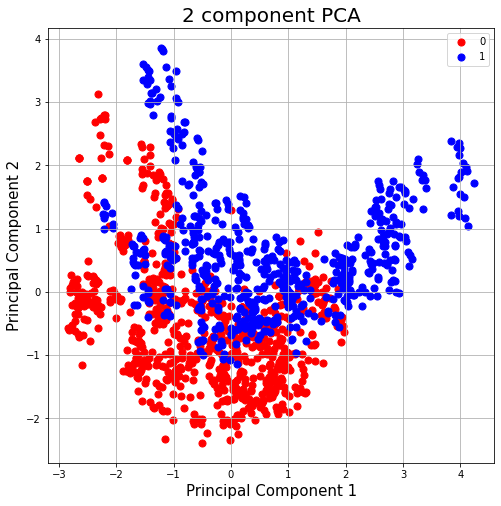

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
    finalDf.loc[indicesToKeep, 'principal component 2'],
    c = color,
    s = 50)
ax.legend(targets)
ax.grid()

# Varians yang Dijelaskan

In [7]:
pca.explained_variance_ratio_

array([0.54497602, 0.32328872])